In [8]:
# Setup inputs to lagrange multiplier
import sympy as sp

x,y,lam,mu = sp.symbols('x y lam mu', real=True)

In [9]:
# add objective function and the constraints

f = (x - 4) ** 2 + (y - 1) ** 2

eq_const = x + y - 8

ineq_const = x - 4.5

In [10]:
# Create the lagrangian

L = f + lam * eq_const + mu * ineq_const

In [11]:
# Differentiate L with respect to x & y
Lx = sp.diff(L, x)
Ly = sp.diff(L, y)

# Create the equations to evaluate
eq1 = sp.Eq(Lx, 0)
eq2 = sp.Eq(Ly, 0)
eq3 = sp.Eq(0, eq_const)
eq4 = sp.Eq(0, mu * ineq_const)


In [14]:
solution = sp.solve([eq1, eq2, eq3, eq4], (x,y,lam,mu), dict=True)
print(solution)

x_val,y_val = solution[1].get(x),solution[1].get(y)

print((x_val - 4) ** 2 + (y_val - 1) ** 2)

[{lam: -5.00000000000000, mu: 4.00000000000000, x: 4.50000000000000, y: 3.50000000000000}, {lam: -3.00000000000000, mu: 0.0, x: 5.50000000000000, y: 2.50000000000000}]
4.50000000000000


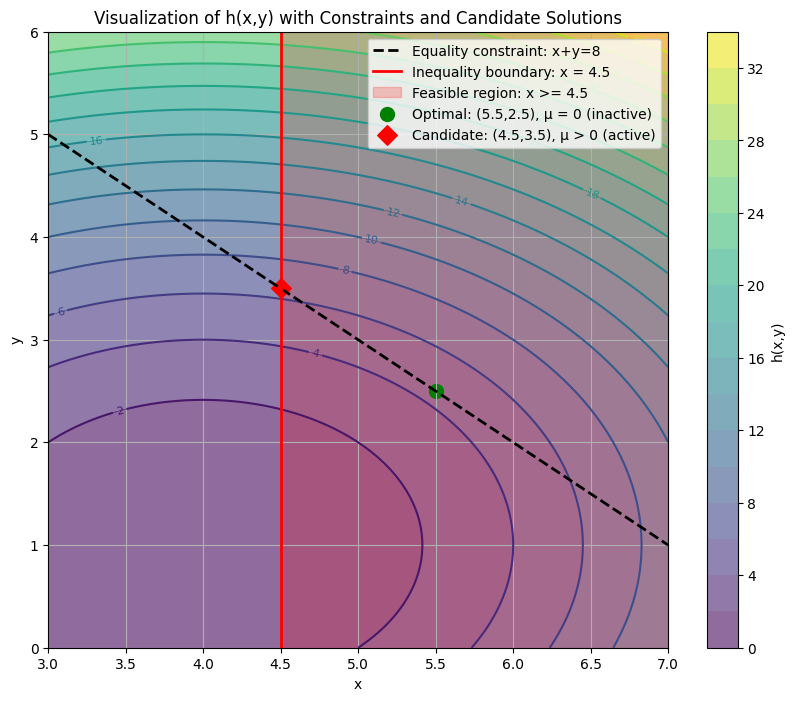

In [15]:
# Visualize the problem

import numpy as np
import matplotlib.pyplot as plt

# Define the objective function h(x,y)
def h(x, y):
    return (x - 4)**2 + (y - 1)**2

# Create a grid of x and y values for the contour plot
x_vals = np.linspace(3, 7, 400)
y_vals = np.linspace(0, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = h(X, Y)

# Create the contour plot
plt.figure(figsize=(10,8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(label='h(x,y)')

# Plot the equality constraint: x+y=8 -> y = 8 - x
x_line = np.linspace(3, 7, 200)
y_line = 8 - x_line
plt.plot(x_line, y_line, 'k--', lw=2, label='Equality constraint: x+y=8')

# Plot the inequality constraint boundary: x = 4.5
plt.axvline(x=4.5, color='r', linestyle='-', lw=2, label='Inequality boundary: x = 4.5')

# Shade the feasible region for the inequality: x >= 4.5
plt.fill_betweenx(y_vals, 4.5, 7, color='red', alpha=0.2, label='Feasible region: x >= 4.5')

# Plot candidate solutions:
# Candidate 1: (5.5, 2.5) — unconstrained optimum on x+y=8 that satisfies x>=4.5 (inequality inactive, mu=0)
plt.scatter(5.5, 2.5, color='green', s=100, marker='o', label='Optimal: (5.5,2.5), μ = 0 (inactive)')
# Candidate 2: (4.5, 3.5) — lies exactly on the inequality boundary (active constraint, μ > 0)
plt.scatter(4.5, 3.5, color='red', s=100, marker='D', label='Candidate: (4.5,3.5), μ > 0 (active)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of h(x,y) with Constraints and Candidate Solutions')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
